In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

In [30]:
# load data
df = pd.read_csv('../datasets/spam.csv', encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [31]:
# drop garbage columns
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
# rename columns
df.columns = ['labels', 'data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [33]:
# create binary labels (0 and 1)
df['b_labels'] = df['labels'].map({'ham':0, 'spam':1})
y = df['b_labels'].values

In [34]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [46]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(df['data'], y, test_size = 0.33)

In [47]:
# convert sentences into sequences
max_vocab_size = 20000
tokenizer = Tokenizer(num_words=max_vocab_size)

In [48]:
tokenizer

In [49]:
# fit on tokenizer
tokenizer.fit_on_texts(x_train)
sequence_train = tokenizer.texts_to_sequences(x_train)
sequence_test = tokenizer.texts_to_sequences(x_test)

In [50]:
# check word index mapping (to check the number of words in vocabulary)
word2idx = tokenizer.word_index
V = len(word2idx)
print("Total count of unique tokens:{}".format(V))

Total count of unique tokens:7246


In [51]:
# pad sequences
data_train = pad_sequences(sequence_train)
print("training set size:{}".format(data_train.shape))

training set size:(3733, 189)


In [52]:
# set the value of T to get sequence length
T = data_train.shape[1]

In [53]:
print(T)

189


In [54]:
# pad the test set
data_test = pad_sequences(sequence_test, maxlen=T)
print("shape of test sensor {}".format(data_test.shape))

shape of test sensor (1839, 189)


In [61]:
# build model

# choose embedding dimensionality
D = 20 # hyper parameter

# hidden state vectorsize
M = 15

# inputlayer
i = Input(shape=(T,)) # input layer input shape of T

# embedding layer
x = Embedding(V + 1, D)(i)

# LSTM layer
x=  LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)

# Dense layer
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [62]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [63]:
# train the mode
r = model.fit(x=data_train, y=y_train, epochs=10, validation_data=(data_test, y_test))

Epoch 1/10
117/117 [==============================] - 15s 101ms/step - loss: 0.4562 - accuracy: 0.8653 - val_loss: 0.3913 - val_accuracy: 0.8673
Epoch 2/10
117/117 [==============================] - 15s 129ms/step - loss: 0.3950 - accuracy: 0.8653 - val_loss: 0.3887 - val_accuracy: 0.8673
Epoch 3/10
117/117 [==============================] - 20s 168ms/step - loss: 0.3817 - accuracy: 0.8653 - val_loss: 0.3560 - val_accuracy: 0.8673
Epoch 4/10
117/117 [==============================] - 16s 136ms/step - loss: 0.2742 - accuracy: 0.8880 - val_loss: 0.1685 - val_accuracy: 0.9701
Epoch 5/10
117/117 [==============================] - 17s 143ms/step - loss: 0.1006 - accuracy: 0.9834 - val_loss: 0.0806 - val_accuracy: 0.9821
Epoch 6/10
117/117 [==============================] - 12s 106ms/step - loss: 0.0479 - accuracy: 0.9917 - val_loss: 0.0593 - val_accuracy: 0.9869
Epoch 7/10
117/117 [==============================] - 11s 97ms/step - loss: 0.0304 - accuracy: 0.9949 - val_loss: 0.0519 - val_acc

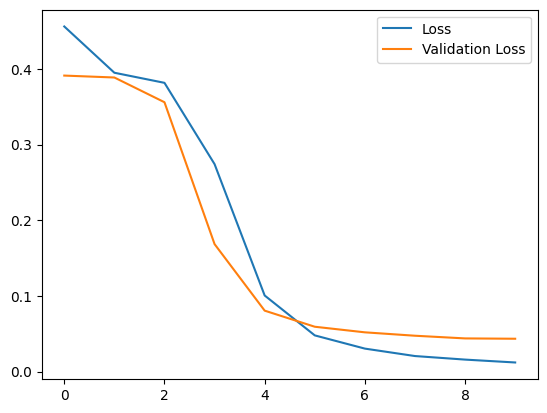

In [64]:
# plot loss function
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

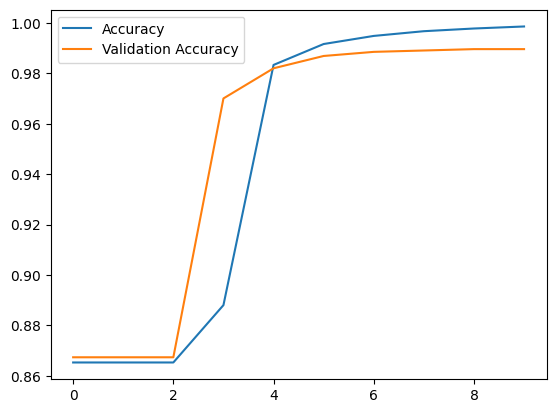

In [65]:
# plot accuracy
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()